In [1]:
import random, math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score

In [4]:
size = 200
dummy_data = {}
bhk_list = []
floor_list = []
years_old_list = []
sqft_list = []
place_list = []
price_list = []
locality_list = ['Marathahalli','Malleswaram','Koramangala','Jayanagar','Banashankari','Hebbal','Indira Nagar','Whitefield','HSR Layout','BTM Layout']

In [5]:
point_dict = {
    'bhk': 
    {
        1:25,2:50,3:75,4:100
    },
    'floor':
    {
        1:10,2:20,3:30,4:40,5:50,6:60,7:70,8:80,9:90,10:100
    },
    'years old':
    {
        1:100,2:94,3:88,4:82,5:76,6:70,7:64,8:58,9:52,10:46,11:40,12:34,13:28,14:22,15:16,16:10
    },
    'locality':
    {
        'Jayanagar':100,'Koramangala':90,'Indira Nagar':80,'Banashankari':70,'Marathahalli':60,'Malleswaram':50,'HSR Layout':40,'Whitefield':30,'BTM Layout':20,'Hebbal':10
    },
    'sqft':
    {
        1000:100,1500:200,2000:300,2500:400,3000:500,3500:600,4000:700,4500:800,5000:900,6000:1000
    }
}

In [6]:
def total_points(x):
    point = 0
    point += point_dict['bhk'][bhk_list[x]]
    point += point_dict['floor'][floor_list[x]]
    point += point_dict['locality'][place_list[x]]
    point += point_dict['years old'][years_old_list[x]]
    point += point_dict['sqft'][math.floor(sqft_list[x]/1000)*1000]
    return point 

In [7]:
for i in range(size):
    bhk_list.append(random.randint(1,4))
    floor_list.append(random.randint(1,10))
    years_old_list.append(random.randint(1,16))
    sqft_list.append(random.randint(1000,5000))
    place_list.append(random.choice(locality_list))

In [8]:
for x in range(size):
    if  10 < total_points(x) <= 300 :
        price_list.append(random.randint(100000,500000))
    elif 300 < total_points(x) <= 600 :
        price_list.append(random.randint(500000,1000000))
    elif 600 < total_points(x) <= 900 :
        price_list.append(random.randint(1000000,1500000))
    elif 900 < total_points(x) <= 1200 :
        price_list.append(random.randint(1500000,2000000))
    else:
        price_list.append(random.randint(2000000,3000000))

In [9]:
dummy_data['bhk'] = bhk_list
dummy_data['floor'] = floor_list
dummy_data['years_old'] = years_old_list
dummy_data['sqft'] = sqft_list
dummy_data['place'] = place_list
dummy_data['price'] = price_list

In [10]:
data = pd.DataFrame.from_dict(dummy_data)

In [11]:
data.head()

,bhk,floor,years_old,sqft,place,price
0,3,10,14,1274,Malleswaram,558598
1,3,8,14,3144,Banashankari,1140726
2,1,8,7,2197,Koramangala,671113
3,2,10,10,2270,Hebbal,778517
4,4,1,8,3327,BTM Layout,1280405


In [12]:
enc = LabelEncoder()

In [13]:
enc.fit(data.place)

LabelEncoder()

In [14]:
enc.classes_

array(['BTM Layout', 'Banashankari', 'HSR Layout', 'Hebbal',
       'Indira Nagar', 'Jayanagar', 'Koramangala', 'Malleswaram',
       'Marathahalli', 'Whitefield'], dtype=object)

In [15]:
data.place = enc.transform(data.place )

In [16]:
data.head()

,bhk,floor,years_old,sqft,place,price
0,3,10,14,1274,7,558598
1,3,8,14,3144,1,1140726
2,1,8,7,2197,6,671113
3,2,10,10,2270,3,778517
4,4,1,8,3327,0,1280405


In [17]:
data.corr()

,bhk,floor,years_old,sqft,place,price
bhk,1.000000,0.039818,-0.044584,0.007856,-0.081063,0.108035
floor,0.039818,1.000000,-0.038417,0.038897,0.077553,0.205070
years_old,-0.044584,-0.038417,1.000000,0.094625,0.120319,-0.101302
sqft,0.007856,0.038897,0.094625,1.000000,0.135026,0.830617
place,-0.081063,0.077553,0.120319,0.135026,1.000000,0.164381
price,0.108035,0.205070,-0.101302,0.830617,0.164381,1.000000


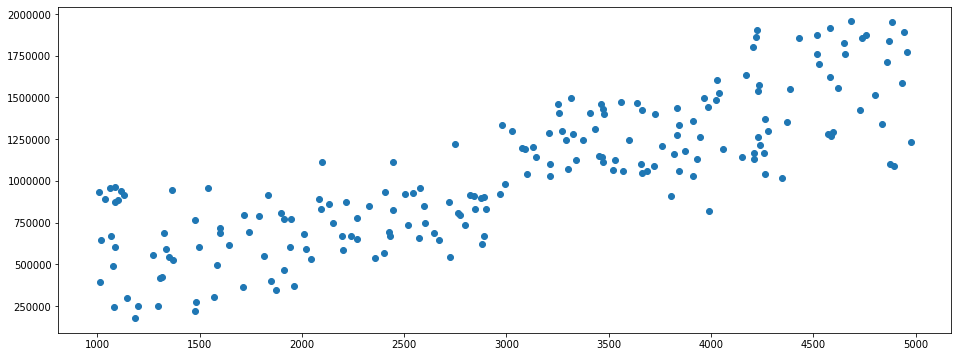

In [18]:
plt.scatter(data['sqft'],data['price'])

In [19]:
X = data.loc[:,['bhk','floor','years_old','sqft','place']]
y = data['price']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [21]:
scaler = StandardScaler()

In [22]:
from sklearn.preprocessing import scale

In [23]:
X_train_scale=scale(X_train[['bhk', 'floor','years_old', 'sqft', 'place']])
X_test_scale=scale(X_test[['bhk', 'floor','years_old', 'sqft', 'place']])

In [24]:
model_lr = LinearRegression()

In [25]:
model_lr.fit(X_train_scale,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
y_predict = model_lr.predict(X_test_scale)

In [27]:
r2_score(y_test, y_predict)

0.7066384929120164

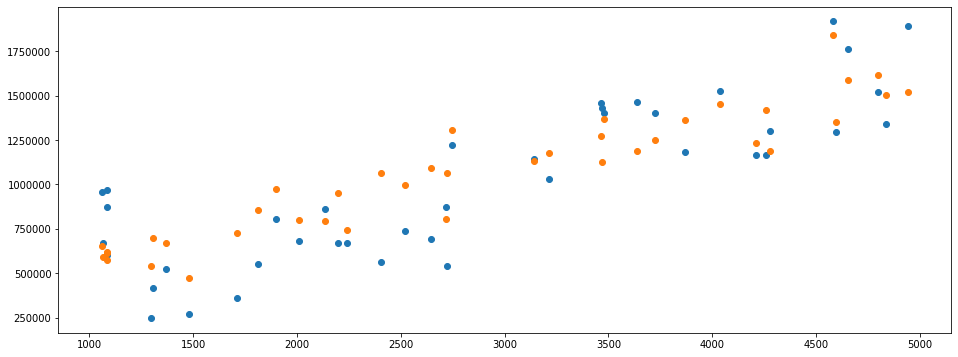

In [28]:
plt.scatter(X_test['sqft'],y_test)
plt.scatter(X_test['sqft'],y_predict)
plt.show()